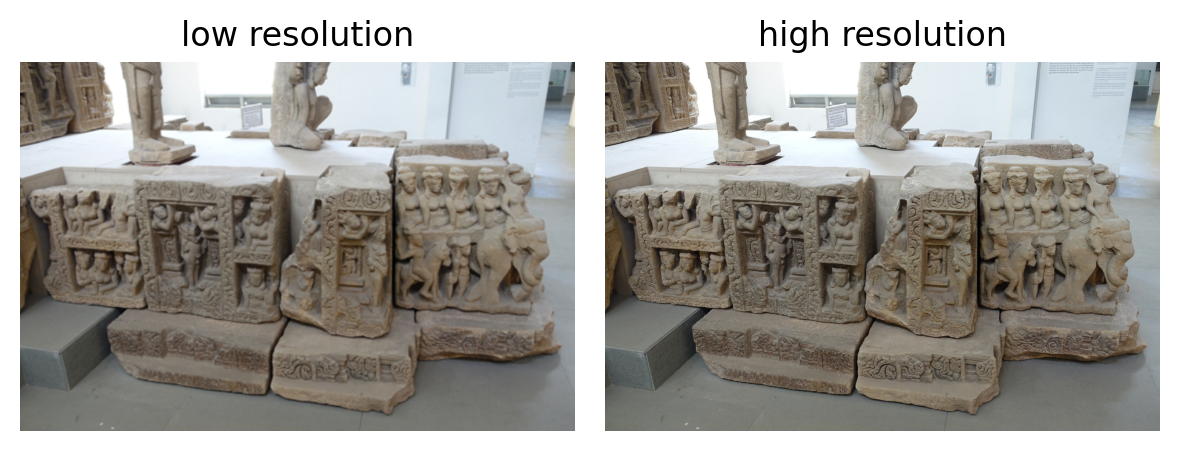

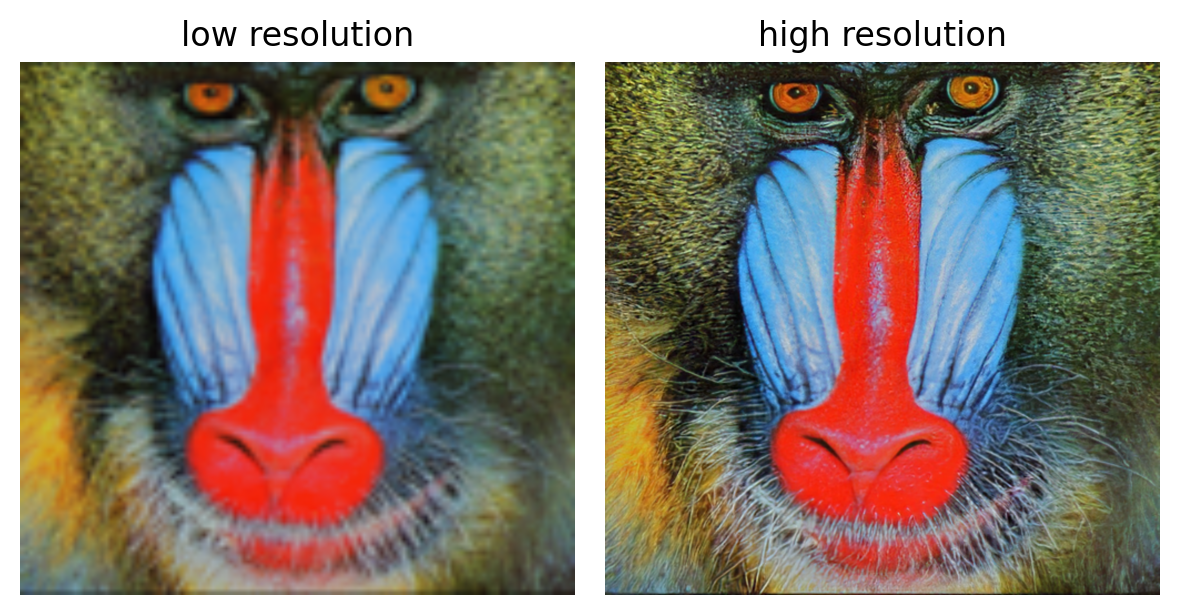

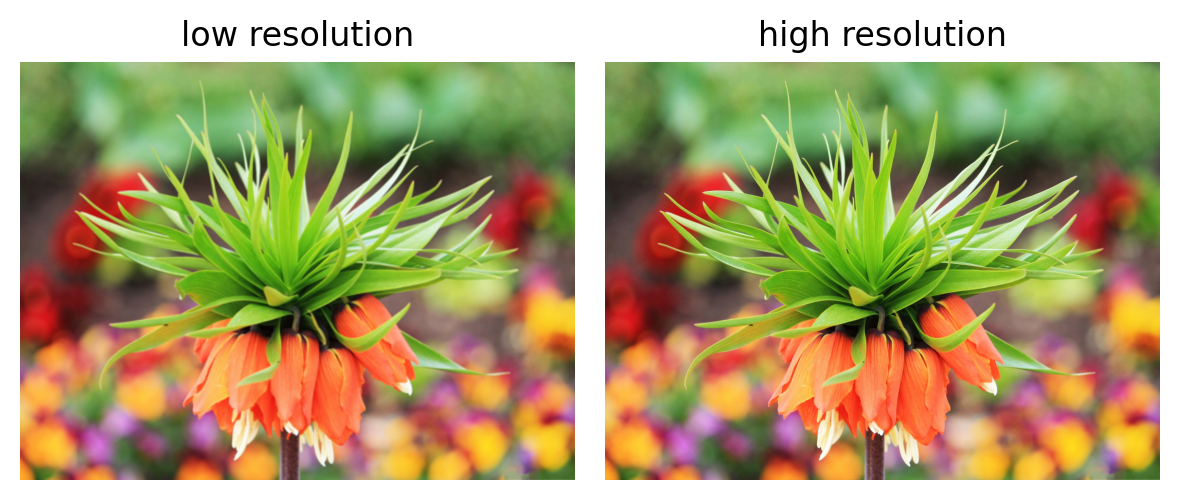

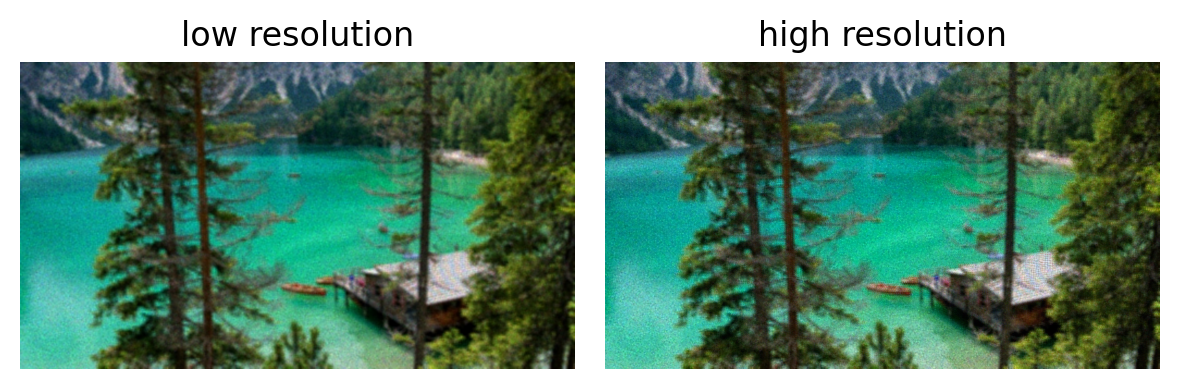

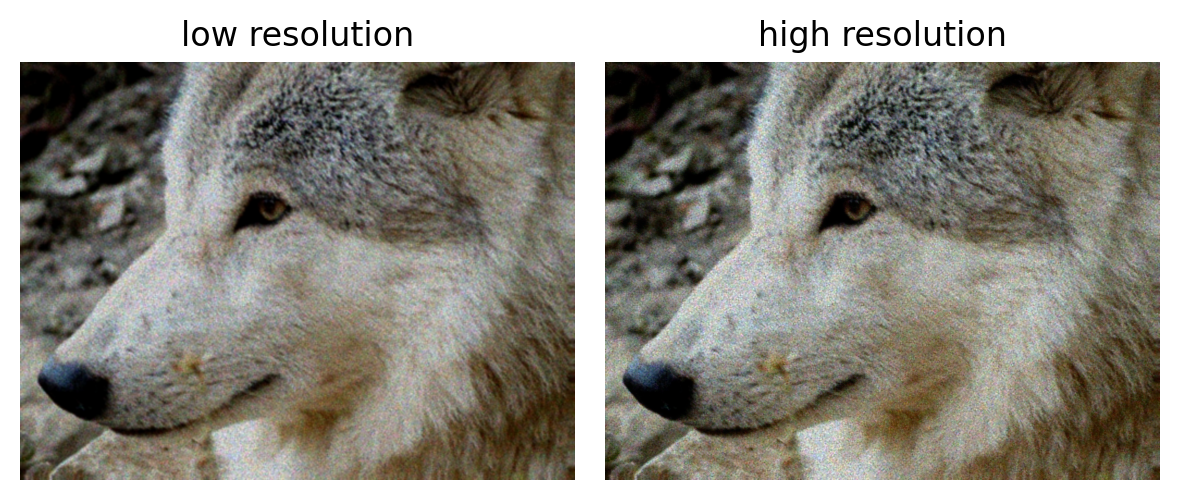

In [2]:
import matplotlib.pyplot as plt
import cv2

def read_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

lr_hr_pair = [
    ('a', 'a_lr.png', 'a_hr.png'), 
    ('b', 'b_lr.png', 'b_hr.png'), 
    ('c', 'c_lr.png', 'c_hr.png'), 
    ('d', 'd_lr.png', 'd_hr.png'), 
    ('e', 'e_lr.png', 'e_hr.png')
]

for name, lr, hr in lr_hr_pair:

    lr = read_image(f'imgs/{lr}')
    hr = read_image(f'imgs/{hr}')

    hr_h, hr_w, _ = hr.shape

    lr_ = cv2.resize(lr, (hr_w*2, hr_h*2))
    hr_ = cv2.resize(hr, (hr_w*2, hr_h*2))

    plt.figure(dpi=200)
    plt.subplot(121)
    plt.imshow(lr_)
    plt.axis('off')
    plt.title('low resolution')
    plt.subplot(122)
    plt.imshow(hr_)
    plt.axis('off')
    plt.title('high resolution')
    plt.tight_layout()
    plt.savefig(f'res/{name}.png')

(100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, 10100, 10200, 10300, 10400, 10500, 10600, 10700, 10800, 10900, 11000, 11100, 11200, 11300, 11400, 11500, 11600, 11700, 11800, 11900, 12000, 12100, 12200, 12300, 12400, 12500, 12600, 12700, 12800, 12900, 13000, 13100, 13200, 13300, 13400, 13500, 13600, 13700, 13800, 13900, 14000, 14100, 14200, 14300, 14400, 14500, 14600, 14700, 14800, 14900, 15100, 15200, 15300, 15400, 15500, 15600, 15700, 15800, 15900, 16000, 16100, 

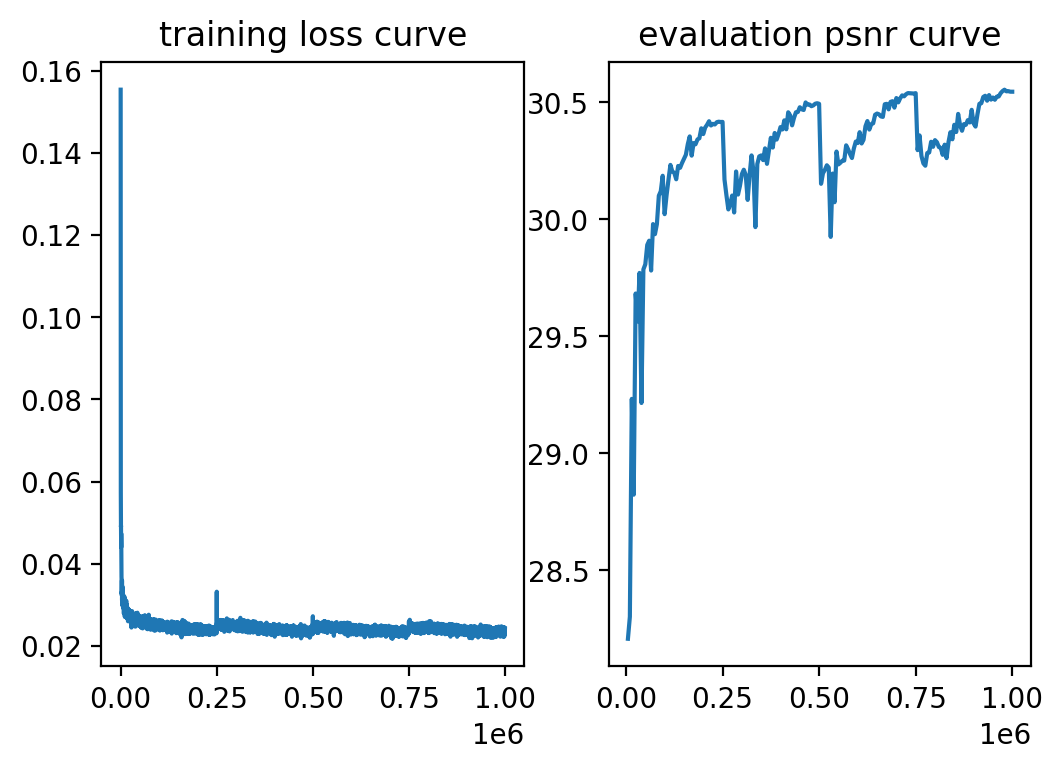

In [8]:
import json
import matplotlib.pyplot as plt

lines = open('esrgan.log.json', 'r').readlines()
training_log = []
for line in lines:
    training_log.append(json.loads(line))
# remove training settings log
training_log = training_log[1:]

iter_collect = []
loss_collect = []
psnr_collect = []

for one_line in training_log:
    iter = one_line['iter']
    mode = one_line['mode']
    if mode == 'train':
        loss = one_line['loss']
        loss_collect.append((iter, loss))
    elif mode == 'val':
        psnr = one_line['PSNR']
        psnr_collect.append((iter, psnr))

loss_iter_axis, loss_values = list(zip(*loss_collect))
psnr_iter_axis, psnr_values = list(zip(*psnr_collect))

plt.figure(dpi=200)
plt.subplot(121)
plt.plot(loss_iter_axis, loss_values)
plt.title('training loss curve')
plt.subplot(122)
plt.plot(psnr_iter_axis, psnr_values)
plt.title('evaluation psnr curve')
plt.savefig('log.png')